In [52]:
import librosa,librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import json
import tensorflow as tf
import IPython.display as ipd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
file_path="Downloads/Audio_Data/genres_original/blues/blues.00000.wav"

In [48]:
def plot_wave(signal,sr):
    librosa.display.waveplot(signal,sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()
    print(librosa.core.get_duration(signal,sr))

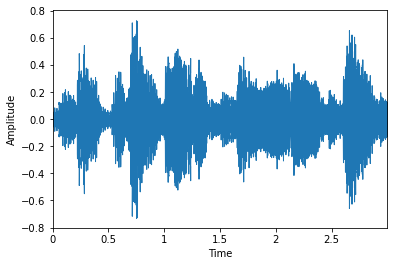

3.0


In [53]:
SAMPLE_RATE=22050
signal,sr=librosa.load(file_path,duration=3,sr=SAMPLE_RATE)
ipd.Audio(signal,rate=sr)
plot_wave(signal_temp,sr)

(66150,)
(66150,)
0.72250366
0.66586256


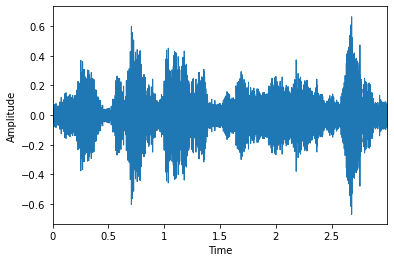

3.0


In [56]:
signal_temp=signal.copy()
pitch_ch=3*np.random.uniform(low=1,high=2)
signal_temp=librosa.effects.pitch_shift(signal,sr=sr,bins_per_octave=12,n_steps=pitch_ch)
print(signal.shape)
print(signal_temp.shape)
print(np.max(signal))
print(np.max(signal_temp))
ipd.Audio(signal_temp,rate=sr)
plot_wave(signal_temp,sr)

1.8246950739426138
(66150,)
(36352,)
(66150,)


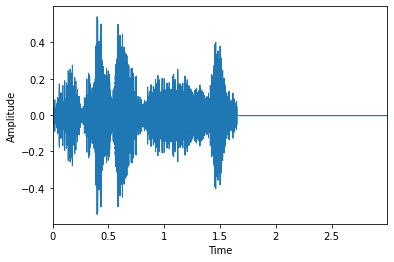

3.0


In [57]:
signal_temp=signal.copy()
time_ch=np.random.uniform(low=0.5,high=2)
print(time_ch)
signal_temp_speed=librosa.effects.time_stretch(signal_temp,time_ch)
print(signal_temp.shape)
print(signal_temp_speed.shape)
minlen=min(signal_temp.shape[0],signal_temp_speed.shape[0])
signal_temp*=0
signal_temp[0:minlen]=signal_temp_speed[0:minlen]
print(signal_temp.shape)
ipd.Audio(signal_temp,rate=sr)
plot_wave(signal_temp,sr)

0.09087264844297109
(66150,)
(66150,)


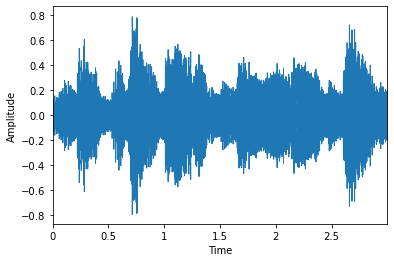

3.0


In [61]:
signal_temp=signal.copy()
noise_amp=0.03*np.random.uniform()*np.max(signal_temp)
print(noise_amp)
signal_temp=signal_temp+noise_amp*np.random.uniform(size=signal_temp.shape[0])
print(signal.shape)
print(signal_temp.shape)
ipd.Audio(signal_temp,rate=sr)
plot_wave(signal_temp,sr)

(66150,) (-7.070587158203125+0j)


Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Magnitude')

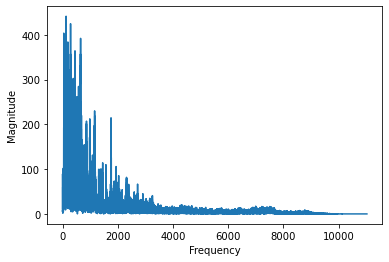

In [59]:
fft=np.fft.fft(signal)
print(fft.shape,fft[0])
magnitude=np.abs(fft)
frequency=np.linspace(0,sr,len(magnitude))
left_freq=frequency[:int(len(magnitude)/2)]
left_mag=magnitude[:int(len(magnitude)/2)]
plt.plot(left_freq,left_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

(66150,) (2987.5066324630675+0j)


Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Magnitude')

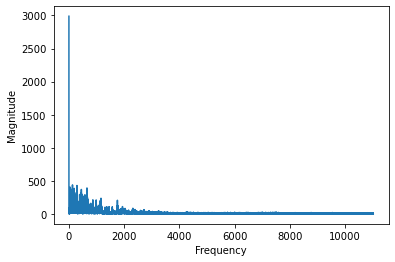

In [62]:
fft=np.fft.fft(signal_temp)
print(fft.shape,fft[0])
magnitude=np.abs(fft)
frequency=np.linspace(0,sr,len(magnitude))
left_freq=frequency[:int(len(magnitude)/2)]
left_mag=magnitude[:int(len(magnitude)/2)]
plt.plot(left_freq,left_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

(1025, 1293)


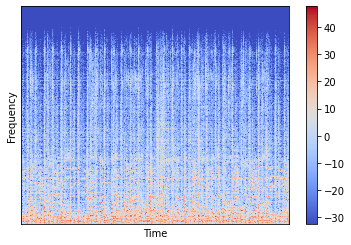

In [36]:
stft=librosa.core.stft(signal,n_fft=2048,hop_length=512)
spectrogram=np.abs(stft)
print(spectrogram.shape)
log_spec=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spec,hop_length=512,sr=sr)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

(13, 1293)


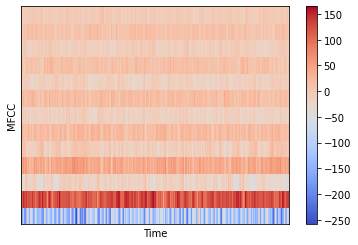

In [38]:
mfcc=librosa.feature.mfcc(signal,n_fft=2048,hop_length=512,n_mfcc=13)
print(mfcc.shape)
librosa.display.specshow(mfcc,hop_length=512,sr=sr)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [2]:
DIRECTORY="./Downloads/Audio_Data/genres_original"
json_path="./Downloads/Audio_Data/genres_original/data.json"
data={"mapping":[],"MFCC":[],"labels":[]}
SAMPLE_RATE=22050
N_FFT=2048
HOP_LENGTH=512
N_MFCC=26
SEGMENTS=10
TRACK_LENGTH=30
samples_per_track=SAMPLE_RATE*TRACK_LENGTH
no_of_samples_per_segment=int(samples_per_track/SEGMENTS)
expected_len_of_mfcc_vector=math.ceil(no_of_samples_per_segment/HOP_LENGTH)

In [3]:
def get_mfccs(directory,json_path,segments,n_fft=2048,n_mfcc=26,hop_length=512,sample_rate=22050):
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(directory)):
        if i==0:
            continue    
        data["mapping"].append(dirpath.split('\\')[-1])
        for filename in filenames:
            #print(dirpath+"/"+filename)
            signal,sr=librosa.load(dirpath+"/"+filename,sr=sample_rate)
            print(len(signal))
            print(librosa.get_duration(y=signal,sr=sr))
            for s in range(SEGMENTS):
                start=no_of_samples_per_segment*s
                end=no_of_samples_per_segment+start
                mfcc=librosa.feature.mfcc(signal[start:end],sr=sr,hop_length=hop_length,n_fft=n_fft,n_mfcc=n_mfcc)
                mfcc=mfcc.T
                print(no_of_samples_per_segment)
                print(mfcc.shape)
                print(expected_len_of_mfcc_vector)
                if expected_len_of_mfcc_vector==len(mfcc):
                    data["MFCC"].append(mfcc.tolist())
                    data["labels"].append(i-1)
                print("file: {} segment: {}".format(filename,s+1))
    with open(json_path,"w") as fp:
        json.dump(data,fp,indent=4)

In [4]:
get_mfccs(DIRECTORY,json_path,10)

661794
30.013333333333332
66150
(130, 26)
130
file: blues.00000.wav segment: 1
66150
(130, 26)
130
file: blues.00000.wav segment: 2
66150
(130, 26)
130
file: blues.00000.wav segment: 3
66150
(130, 26)
130
file: blues.00000.wav segment: 4
66150
(130, 26)
130
file: blues.00000.wav segment: 5
66150
(130, 26)
130
file: blues.00000.wav segment: 6
66150
(130, 26)
130
file: blues.00000.wav segment: 7
66150
(130, 26)
130
file: blues.00000.wav segment: 8
66150
(130, 26)
130
file: blues.00000.wav segment: 9
66150
(130, 26)
130
file: blues.00000.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00001.wav segment: 1
66150
(130, 26)
130
file: blues.00001.wav segment: 2
66150
(130, 26)
130
file: blues.00001.wav segment: 3
66150
(130, 26)
130
file: blues.00001.wav segment: 4
66150
(130, 26)
130
file: blues.00001.wav segment: 5
66150
(130, 26)
130
file: blues.00001.wav segment: 6
66150
(130, 26)
130
file: blues.00001.wav segment: 7
66150
(130, 26)
130
file: blues.00001.wav segm

66150
(130, 26)
130
file: blues.00015.wav segment: 9
66150
(130, 26)
130
file: blues.00015.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00016.wav segment: 1
66150
(130, 26)
130
file: blues.00016.wav segment: 2
66150
(130, 26)
130
file: blues.00016.wav segment: 3
66150
(130, 26)
130
file: blues.00016.wav segment: 4
66150
(130, 26)
130
file: blues.00016.wav segment: 5
66150
(130, 26)
130
file: blues.00016.wav segment: 6
66150
(130, 26)
130
file: blues.00016.wav segment: 7
66150
(130, 26)
130
file: blues.00016.wav segment: 8
66150
(130, 26)
130
file: blues.00016.wav segment: 9
66150
(130, 26)
130
file: blues.00016.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00017.wav segment: 1
66150
(130, 26)
130
file: blues.00017.wav segment: 2
66150
(130, 26)
130
file: blues.00017.wav segment: 3
66150
(130, 26)
130
file: blues.00017.wav segment: 4
66150
(130, 26)
130
file: blues.00017.wav segment: 5
66150
(130, 26)
130
file: blues.00017.wav seg

66150
(130, 26)
130
file: blues.00031.wav segment: 3
66150
(130, 26)
130
file: blues.00031.wav segment: 4
66150
(130, 26)
130
file: blues.00031.wav segment: 5
66150
(130, 26)
130
file: blues.00031.wav segment: 6
66150
(130, 26)
130
file: blues.00031.wav segment: 7
66150
(130, 26)
130
file: blues.00031.wav segment: 8
66150
(130, 26)
130
file: blues.00031.wav segment: 9
66150
(130, 26)
130
file: blues.00031.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00032.wav segment: 1
66150
(130, 26)
130
file: blues.00032.wav segment: 2
66150
(130, 26)
130
file: blues.00032.wav segment: 3
66150
(130, 26)
130
file: blues.00032.wav segment: 4
66150
(130, 26)
130
file: blues.00032.wav segment: 5
66150
(130, 26)
130
file: blues.00032.wav segment: 6
66150
(130, 26)
130
file: blues.00032.wav segment: 7
66150
(130, 26)
130
file: blues.00032.wav segment: 8
66150
(130, 26)
130
file: blues.00032.wav segment: 9
66150
(130, 26)
130
file: blues.00032.wav segment: 10
661794
30.01333333

661794
30.013333333333332
66150
(130, 26)
130
file: blues.00046.wav segment: 1
66150
(130, 26)
130
file: blues.00046.wav segment: 2
66150
(130, 26)
130
file: blues.00046.wav segment: 3
66150
(130, 26)
130
file: blues.00046.wav segment: 4
66150
(130, 26)
130
file: blues.00046.wav segment: 5
66150
(130, 26)
130
file: blues.00046.wav segment: 6
66150
(130, 26)
130
file: blues.00046.wav segment: 7
66150
(130, 26)
130
file: blues.00046.wav segment: 8
66150
(130, 26)
130
file: blues.00046.wav segment: 9
66150
(130, 26)
130
file: blues.00046.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00047.wav segment: 1
66150
(130, 26)
130
file: blues.00047.wav segment: 2
66150
(130, 26)
130
file: blues.00047.wav segment: 3
66150
(130, 26)
130
file: blues.00047.wav segment: 4
66150
(130, 26)
130
file: blues.00047.wav segment: 5
66150
(130, 26)
130
file: blues.00047.wav segment: 6
66150
(130, 26)
130
file: blues.00047.wav segment: 7
66150
(130, 26)
130
file: blues.00047.wav segm

66150
(130, 26)
130
file: blues.00060.wav segment: 9
66150
(130, 26)
130
file: blues.00060.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00061.wav segment: 1
66150
(130, 26)
130
file: blues.00061.wav segment: 2
66150
(130, 26)
130
file: blues.00061.wav segment: 3
66150
(130, 26)
130
file: blues.00061.wav segment: 4
66150
(130, 26)
130
file: blues.00061.wav segment: 5
66150
(130, 26)
130
file: blues.00061.wav segment: 6
66150
(130, 26)
130
file: blues.00061.wav segment: 7
66150
(130, 26)
130
file: blues.00061.wav segment: 8
66150
(130, 26)
130
file: blues.00061.wav segment: 9
66150
(130, 26)
130
file: blues.00061.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00062.wav segment: 1
66150
(130, 26)
130
file: blues.00062.wav segment: 2
66150
(130, 26)
130
file: blues.00062.wav segment: 3
66150
(130, 26)
130
file: blues.00062.wav segment: 4
66150
(130, 26)
130
file: blues.00062.wav segment: 5
66150
(130, 26)
130
file: blues.00062.wav seg

66150
(130, 26)
130
file: blues.00076.wav segment: 1
66150
(130, 26)
130
file: blues.00076.wav segment: 2
66150
(130, 26)
130
file: blues.00076.wav segment: 3
66150
(130, 26)
130
file: blues.00076.wav segment: 4
66150
(130, 26)
130
file: blues.00076.wav segment: 5
66150
(130, 26)
130
file: blues.00076.wav segment: 6
66150
(130, 26)
130
file: blues.00076.wav segment: 7
66150
(130, 26)
130
file: blues.00076.wav segment: 8
66150
(130, 26)
130
file: blues.00076.wav segment: 9
66150
(130, 26)
130
file: blues.00076.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00077.wav segment: 1
66150
(130, 26)
130
file: blues.00077.wav segment: 2
66150
(130, 26)
130
file: blues.00077.wav segment: 3
66150
(130, 26)
130
file: blues.00077.wav segment: 4
66150
(130, 26)
130
file: blues.00077.wav segment: 5
66150
(130, 26)
130
file: blues.00077.wav segment: 6
66150
(130, 26)
130
file: blues.00077.wav segment: 7
66150
(130, 26)
130
file: blues.00077.wav segment: 8
66150
(130, 26)
130

66150
(130, 26)
130
file: blues.00091.wav segment: 5
66150
(130, 26)
130
file: blues.00091.wav segment: 6
66150
(130, 26)
130
file: blues.00091.wav segment: 7
66150
(130, 26)
130
file: blues.00091.wav segment: 8
66150
(130, 26)
130
file: blues.00091.wav segment: 9
66150
(130, 26)
130
file: blues.00091.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00092.wav segment: 1
66150
(130, 26)
130
file: blues.00092.wav segment: 2
66150
(130, 26)
130
file: blues.00092.wav segment: 3
66150
(130, 26)
130
file: blues.00092.wav segment: 4
66150
(130, 26)
130
file: blues.00092.wav segment: 5
66150
(130, 26)
130
file: blues.00092.wav segment: 6
66150
(130, 26)
130
file: blues.00092.wav segment: 7
66150
(130, 26)
130
file: blues.00092.wav segment: 8
66150
(130, 26)
130
file: blues.00092.wav segment: 9
66150
(130, 26)
130
file: blues.00092.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: blues.00093.wav segment: 1
66150
(130, 26)
130
file: blues.00093.wav seg

661794
30.013333333333332
66150
(130, 26)
130
file: classical.00006.wav segment: 1
66150
(130, 26)
130
file: classical.00006.wav segment: 2
66150
(130, 26)
130
file: classical.00006.wav segment: 3
66150
(130, 26)
130
file: classical.00006.wav segment: 4
66150
(130, 26)
130
file: classical.00006.wav segment: 5
66150
(130, 26)
130
file: classical.00006.wav segment: 6
66150
(130, 26)
130
file: classical.00006.wav segment: 7
66150
(130, 26)
130
file: classical.00006.wav segment: 8
66150
(130, 26)
130
file: classical.00006.wav segment: 9
66150
(130, 26)
130
file: classical.00006.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00007.wav segment: 1
66150
(130, 26)
130
file: classical.00007.wav segment: 2
66150
(130, 26)
130
file: classical.00007.wav segment: 3
66150
(130, 26)
130
file: classical.00007.wav segment: 4
66150
(130, 26)
130
file: classical.00007.wav segment: 5
66150
(130, 26)
130
file: classical.00007.wav segment: 6
66150
(130, 26)
130
file: classical

66150
(130, 26)
130
file: classical.00020.wav segment: 9
66150
(130, 26)
130
file: classical.00020.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00021.wav segment: 1
66150
(130, 26)
130
file: classical.00021.wav segment: 2
66150
(130, 26)
130
file: classical.00021.wav segment: 3
66150
(130, 26)
130
file: classical.00021.wav segment: 4
66150
(130, 26)
130
file: classical.00021.wav segment: 5
66150
(130, 26)
130
file: classical.00021.wav segment: 6
66150
(130, 26)
130
file: classical.00021.wav segment: 7
66150
(130, 26)
130
file: classical.00021.wav segment: 8
66150
(130, 26)
130
file: classical.00021.wav segment: 9
66150
(130, 26)
130
file: classical.00021.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00022.wav segment: 1
66150
(130, 26)
130
file: classical.00022.wav segment: 2
66150
(130, 26)
130
file: classical.00022.wav segment: 3
66150
(130, 26)
130
file: classical.00022.wav segment: 4
66150
(130, 26)
130
file: classica

661794
30.013333333333332
66150
(130, 26)
130
file: classical.00035.wav segment: 1
66150
(130, 26)
130
file: classical.00035.wav segment: 2
66150
(130, 26)
130
file: classical.00035.wav segment: 3
66150
(130, 26)
130
file: classical.00035.wav segment: 4
66150
(130, 26)
130
file: classical.00035.wav segment: 5
66150
(130, 26)
130
file: classical.00035.wav segment: 6
66150
(130, 26)
130
file: classical.00035.wav segment: 7
66150
(130, 26)
130
file: classical.00035.wav segment: 8
66150
(130, 26)
130
file: classical.00035.wav segment: 9
66150
(130, 26)
130
file: classical.00035.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00036.wav segment: 1
66150
(130, 26)
130
file: classical.00036.wav segment: 2
66150
(130, 26)
130
file: classical.00036.wav segment: 3
66150
(130, 26)
130
file: classical.00036.wav segment: 4
66150
(130, 26)
130
file: classical.00036.wav segment: 5
66150
(130, 26)
130
file: classical.00036.wav segment: 6
66150
(130, 26)
130
file: classical

66150
(130, 26)
130
file: classical.00049.wav segment: 4
66150
(130, 26)
130
file: classical.00049.wav segment: 5
66150
(130, 26)
130
file: classical.00049.wav segment: 6
66150
(130, 26)
130
file: classical.00049.wav segment: 7
66150
(130, 26)
130
file: classical.00049.wav segment: 8
66150
(130, 26)
130
file: classical.00049.wav segment: 9
66150
(130, 26)
130
file: classical.00049.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00050.wav segment: 1
66150
(130, 26)
130
file: classical.00050.wav segment: 2
66150
(130, 26)
130
file: classical.00050.wav segment: 3
66150
(130, 26)
130
file: classical.00050.wav segment: 4
66150
(130, 26)
130
file: classical.00050.wav segment: 5
66150
(130, 26)
130
file: classical.00050.wav segment: 6
66150
(130, 26)
130
file: classical.00050.wav segment: 7
66150
(130, 26)
130
file: classical.00050.wav segment: 8
66150
(130, 26)
130
file: classical.00050.wav segment: 9
66150
(130, 26)
130
file: classical.00050.wav segment: 10
661

66150
(130, 26)
130
file: classical.00063.wav segment: 5
66150
(130, 26)
130
file: classical.00063.wav segment: 6
66150
(130, 26)
130
file: classical.00063.wav segment: 7
66150
(130, 26)
130
file: classical.00063.wav segment: 8
66150
(130, 26)
130
file: classical.00063.wav segment: 9
66150
(130, 26)
130
file: classical.00063.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00064.wav segment: 1
66150
(130, 26)
130
file: classical.00064.wav segment: 2
66150
(130, 26)
130
file: classical.00064.wav segment: 3
66150
(130, 26)
130
file: classical.00064.wav segment: 4
66150
(130, 26)
130
file: classical.00064.wav segment: 5
66150
(130, 26)
130
file: classical.00064.wav segment: 6
66150
(130, 26)
130
file: classical.00064.wav segment: 7
66150
(130, 26)
130
file: classical.00064.wav segment: 8
66150
(130, 26)
130
file: classical.00064.wav segment: 9
66150
(130, 26)
130
file: classical.00064.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classica

66150
(130, 26)
130
file: classical.00078.wav segment: 4
66150
(130, 26)
130
file: classical.00078.wav segment: 5
66150
(130, 26)
130
file: classical.00078.wav segment: 6
66150
(130, 26)
130
file: classical.00078.wav segment: 7
66150
(130, 26)
130
file: classical.00078.wav segment: 8
66150
(130, 26)
130
file: classical.00078.wav segment: 9
66150
(130, 26)
130
file: classical.00078.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00079.wav segment: 1
66150
(130, 26)
130
file: classical.00079.wav segment: 2
66150
(130, 26)
130
file: classical.00079.wav segment: 3
66150
(130, 26)
130
file: classical.00079.wav segment: 4
66150
(130, 26)
130
file: classical.00079.wav segment: 5
66150
(130, 26)
130
file: classical.00079.wav segment: 6
66150
(130, 26)
130
file: classical.00079.wav segment: 7
66150
(130, 26)
130
file: classical.00079.wav segment: 8
66150
(130, 26)
130
file: classical.00079.wav segment: 9
66150
(130, 26)
130
file: classical.00079.wav segment: 10
661

66150
(130, 26)
130
file: classical.00092.wav segment: 7
66150
(130, 26)
130
file: classical.00092.wav segment: 8
66150
(130, 26)
130
file: classical.00092.wav segment: 9
66150
(130, 26)
130
file: classical.00092.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00093.wav segment: 1
66150
(130, 26)
130
file: classical.00093.wav segment: 2
66150
(130, 26)
130
file: classical.00093.wav segment: 3
66150
(130, 26)
130
file: classical.00093.wav segment: 4
66150
(130, 26)
130
file: classical.00093.wav segment: 5
66150
(130, 26)
130
file: classical.00093.wav segment: 6
66150
(130, 26)
130
file: classical.00093.wav segment: 7
66150
(130, 26)
130
file: classical.00093.wav segment: 8
66150
(130, 26)
130
file: classical.00093.wav segment: 9
66150
(130, 26)
130
file: classical.00093.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: classical.00094.wav segment: 1
66150
(130, 26)
130
file: classical.00094.wav segment: 2
66150
(130, 26)
130
file: classica

661100
29.98185941043084
66150
(130, 26)
130
file: country.00007.wav segment: 1
66150
(130, 26)
130
file: country.00007.wav segment: 2
66150
(130, 26)
130
file: country.00007.wav segment: 3
66150
(130, 26)
130
file: country.00007.wav segment: 4
66150
(130, 26)
130
file: country.00007.wav segment: 5
66150
(130, 26)
130
file: country.00007.wav segment: 6
66150
(130, 26)
130
file: country.00007.wav segment: 7
66150
(130, 26)
130
file: country.00007.wav segment: 8
66150
(130, 26)
130
file: country.00007.wav segment: 9
66150
(129, 26)
130
file: country.00007.wav segment: 10
663740
30.1015873015873
66150
(130, 26)
130
file: country.00008.wav segment: 1
66150
(130, 26)
130
file: country.00008.wav segment: 2
66150
(130, 26)
130
file: country.00008.wav segment: 3
66150
(130, 26)
130
file: country.00008.wav segment: 4
66150
(130, 26)
130
file: country.00008.wav segment: 5
66150
(130, 26)
130
file: country.00008.wav segment: 6
66150
(130, 26)
130
file: country.00008.wav segment: 7
66150
(130, 26)

66150
(130, 26)
130
file: country.00022.wav segment: 2
66150
(130, 26)
130
file: country.00022.wav segment: 3
66150
(130, 26)
130
file: country.00022.wav segment: 4
66150
(130, 26)
130
file: country.00022.wav segment: 5
66150
(130, 26)
130
file: country.00022.wav segment: 6
66150
(130, 26)
130
file: country.00022.wav segment: 7
66150
(130, 26)
130
file: country.00022.wav segment: 8
66150
(130, 26)
130
file: country.00022.wav segment: 9
66150
(130, 26)
130
file: country.00022.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00023.wav segment: 1
66150
(130, 26)
130
file: country.00023.wav segment: 2
66150
(130, 26)
130
file: country.00023.wav segment: 3
66150
(130, 26)
130
file: country.00023.wav segment: 4
66150
(130, 26)
130
file: country.00023.wav segment: 5
66150
(130, 26)
130
file: country.00023.wav segment: 6
66150
(130, 26)
130
file: country.00023.wav segment: 7
66150
(130, 26)
130
file: country.00023.wav segment: 8
66150
(130, 26)
130
file: country.0002

66150
(130, 26)
130
file: country.00037.wav segment: 4
66150
(130, 26)
130
file: country.00037.wav segment: 5
66150
(130, 26)
130
file: country.00037.wav segment: 6
66150
(130, 26)
130
file: country.00037.wav segment: 7
66150
(130, 26)
130
file: country.00037.wav segment: 8
66150
(130, 26)
130
file: country.00037.wav segment: 9
66150
(130, 26)
130
file: country.00037.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00038.wav segment: 1
66150
(130, 26)
130
file: country.00038.wav segment: 2
66150
(130, 26)
130
file: country.00038.wav segment: 3
66150
(130, 26)
130
file: country.00038.wav segment: 4
66150
(130, 26)
130
file: country.00038.wav segment: 5
66150
(130, 26)
130
file: country.00038.wav segment: 6
66150
(130, 26)
130
file: country.00038.wav segment: 7
66150
(130, 26)
130
file: country.00038.wav segment: 8
66150
(130, 26)
130
file: country.00038.wav segment: 9
66150
(130, 26)
130
file: country.00038.wav segment: 10
661794
30.013333333333332
66150
(130,

66150
(130, 26)
130
file: country.00051.wav segment: 7
66150
(130, 26)
130
file: country.00051.wav segment: 8
66150
(130, 26)
130
file: country.00051.wav segment: 9
66150
(130, 26)
130
file: country.00051.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00052.wav segment: 1
66150
(130, 26)
130
file: country.00052.wav segment: 2
66150
(130, 26)
130
file: country.00052.wav segment: 3
66150
(130, 26)
130
file: country.00052.wav segment: 4
66150
(130, 26)
130
file: country.00052.wav segment: 5
66150
(130, 26)
130
file: country.00052.wav segment: 6
66150
(130, 26)
130
file: country.00052.wav segment: 7
66150
(130, 26)
130
file: country.00052.wav segment: 8
66150
(130, 26)
130
file: country.00052.wav segment: 9
66150
(130, 26)
130
file: country.00052.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00053.wav segment: 1
66150
(130, 26)
130
file: country.00053.wav segment: 2
66150
(130, 26)
130
file: country.00053.wav segment: 3
66150
(130,

66150
(130, 26)
130
file: country.00066.wav segment: 5
66150
(130, 26)
130
file: country.00066.wav segment: 6
66150
(130, 26)
130
file: country.00066.wav segment: 7
66150
(130, 26)
130
file: country.00066.wav segment: 8
66150
(130, 26)
130
file: country.00066.wav segment: 9
66150
(130, 26)
130
file: country.00066.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00067.wav segment: 1
66150
(130, 26)
130
file: country.00067.wav segment: 2
66150
(130, 26)
130
file: country.00067.wav segment: 3
66150
(130, 26)
130
file: country.00067.wav segment: 4
66150
(130, 26)
130
file: country.00067.wav segment: 5
66150
(130, 26)
130
file: country.00067.wav segment: 6
66150
(130, 26)
130
file: country.00067.wav segment: 7
66150
(130, 26)
130
file: country.00067.wav segment: 8
66150
(130, 26)
130
file: country.00067.wav segment: 9
66150
(130, 26)
130
file: country.00067.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00068.wav segment: 1
66150
(130,

661794
30.013333333333332
66150
(130, 26)
130
file: country.00081.wav segment: 1
66150
(130, 26)
130
file: country.00081.wav segment: 2
66150
(130, 26)
130
file: country.00081.wav segment: 3
66150
(130, 26)
130
file: country.00081.wav segment: 4
66150
(130, 26)
130
file: country.00081.wav segment: 5
66150
(130, 26)
130
file: country.00081.wav segment: 6
66150
(130, 26)
130
file: country.00081.wav segment: 7
66150
(130, 26)
130
file: country.00081.wav segment: 8
66150
(130, 26)
130
file: country.00081.wav segment: 9
66150
(130, 26)
130
file: country.00081.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00082.wav segment: 1
66150
(130, 26)
130
file: country.00082.wav segment: 2
66150
(130, 26)
130
file: country.00082.wav segment: 3
66150
(130, 26)
130
file: country.00082.wav segment: 4
66150
(130, 26)
130
file: country.00082.wav segment: 5
66150
(130, 26)
130
file: country.00082.wav segment: 6
66150
(130, 26)
130
file: country.00082.wav segment: 7
66150
(130, 

661794
30.013333333333332
66150
(130, 26)
130
file: country.00096.wav segment: 1
66150
(130, 26)
130
file: country.00096.wav segment: 2
66150
(130, 26)
130
file: country.00096.wav segment: 3
66150
(130, 26)
130
file: country.00096.wav segment: 4
66150
(130, 26)
130
file: country.00096.wav segment: 5
66150
(130, 26)
130
file: country.00096.wav segment: 6
66150
(130, 26)
130
file: country.00096.wav segment: 7
66150
(130, 26)
130
file: country.00096.wav segment: 8
66150
(130, 26)
130
file: country.00096.wav segment: 9
66150
(130, 26)
130
file: country.00096.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: country.00097.wav segment: 1
66150
(130, 26)
130
file: country.00097.wav segment: 2
66150
(130, 26)
130
file: country.00097.wav segment: 3
66150
(130, 26)
130
file: country.00097.wav segment: 4
66150
(130, 26)
130
file: country.00097.wav segment: 5
66150
(130, 26)
130
file: country.00097.wav segment: 6
66150
(130, 26)
130
file: country.00097.wav segment: 7
66150
(130, 

66150
(130, 26)
130
file: disco.00011.wav segment: 10
663520
30.091609977324264
66150
(130, 26)
130
file: disco.00012.wav segment: 1
66150
(130, 26)
130
file: disco.00012.wav segment: 2
66150
(130, 26)
130
file: disco.00012.wav segment: 3
66150
(130, 26)
130
file: disco.00012.wav segment: 4
66150
(130, 26)
130
file: disco.00012.wav segment: 5
66150
(130, 26)
130
file: disco.00012.wav segment: 6
66150
(130, 26)
130
file: disco.00012.wav segment: 7
66150
(130, 26)
130
file: disco.00012.wav segment: 8
66150
(130, 26)
130
file: disco.00012.wav segment: 9
66150
(130, 26)
130
file: disco.00012.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: disco.00013.wav segment: 1
66150
(130, 26)
130
file: disco.00013.wav segment: 2
66150
(130, 26)
130
file: disco.00013.wav segment: 3
66150
(130, 26)
130
file: disco.00013.wav segment: 4
66150
(130, 26)
130
file: disco.00013.wav segment: 5
66150
(130, 26)
130
file: disco.00013.wav segment: 6
66150
(130, 26)
130
file: disco.00013.wav seg

661794
30.013333333333332
66150
(130, 26)
130
file: disco.00027.wav segment: 1
66150
(130, 26)
130
file: disco.00027.wav segment: 2
66150
(130, 26)
130
file: disco.00027.wav segment: 3
66150
(130, 26)
130
file: disco.00027.wav segment: 4
66150
(130, 26)
130
file: disco.00027.wav segment: 5
66150
(130, 26)
130
file: disco.00027.wav segment: 6
66150
(130, 26)
130
file: disco.00027.wav segment: 7
66150
(130, 26)
130
file: disco.00027.wav segment: 8
66150
(130, 26)
130
file: disco.00027.wav segment: 9
66150
(130, 26)
130
file: disco.00027.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: disco.00028.wav segment: 1
66150
(130, 26)
130
file: disco.00028.wav segment: 2
66150
(130, 26)
130
file: disco.00028.wav segment: 3
66150
(130, 26)
130
file: disco.00028.wav segment: 4
66150
(130, 26)
130
file: disco.00028.wav segment: 5
66150
(130, 26)
130
file: disco.00028.wav segment: 6
66150
(130, 26)
130
file: disco.00028.wav segment: 7
66150
(130, 26)
130
file: disco.00028.wav segm

66150
(130, 26)
130
file: disco.00041.wav segment: 9
66150
(130, 26)
130
file: disco.00041.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: disco.00042.wav segment: 1
66150
(130, 26)
130
file: disco.00042.wav segment: 2
66150
(130, 26)
130
file: disco.00042.wav segment: 3
66150
(130, 26)
130
file: disco.00042.wav segment: 4
66150
(130, 26)
130
file: disco.00042.wav segment: 5
66150
(130, 26)
130
file: disco.00042.wav segment: 6
66150
(130, 26)
130
file: disco.00042.wav segment: 7
66150
(130, 26)
130
file: disco.00042.wav segment: 8
66150
(130, 26)
130
file: disco.00042.wav segment: 9
66150
(130, 26)
130
file: disco.00042.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: disco.00043.wav segment: 1
66150
(130, 26)
130
file: disco.00043.wav segment: 2
66150
(130, 26)
130
file: disco.00043.wav segment: 3
66150
(130, 26)
130
file: disco.00043.wav segment: 4
66150
(130, 26)
130
file: disco.00043.wav segment: 5
66150
(130, 26)
130
file: disco.00043.wav seg

(130, 26)
130
file: disco.00057.wav segment: 6
66150
(130, 26)
130
file: disco.00057.wav segment: 7
66150
(130, 26)
130
file: disco.00057.wav segment: 8
66150
(130, 26)
130
file: disco.00057.wav segment: 9
66150
(130, 26)
130
file: disco.00057.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: disco.00058.wav segment: 1
66150
(130, 26)
130
file: disco.00058.wav segment: 2
66150
(130, 26)
130
file: disco.00058.wav segment: 3
66150
(130, 26)
130
file: disco.00058.wav segment: 4
66150
(130, 26)
130
file: disco.00058.wav segment: 5
66150
(130, 26)
130
file: disco.00058.wav segment: 6
66150
(130, 26)
130
file: disco.00058.wav segment: 7
66150
(130, 26)
130
file: disco.00058.wav segment: 8
66150
(130, 26)
130
file: disco.00058.wav segment: 9
66150
(130, 26)
130
file: disco.00058.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: disco.00059.wav segment: 1
66150
(130, 26)
130
file: disco.00059.wav segment: 2
66150
(130, 26)
130
file: disco.00059.wav segment: 3


661504
30.00018140589569
66150
(130, 26)
130
file: disco.00073.wav segment: 1
66150
(130, 26)
130
file: disco.00073.wav segment: 2
66150
(130, 26)
130
file: disco.00073.wav segment: 3
66150
(130, 26)
130
file: disco.00073.wav segment: 4
66150
(130, 26)
130
file: disco.00073.wav segment: 5
66150
(130, 26)
130
file: disco.00073.wav segment: 6
66150
(130, 26)
130
file: disco.00073.wav segment: 7
66150
(130, 26)
130
file: disco.00073.wav segment: 8
66150
(130, 26)
130
file: disco.00073.wav segment: 9
66150
(130, 26)
130
file: disco.00073.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: disco.00074.wav segment: 1
66150
(130, 26)
130
file: disco.00074.wav segment: 2
66150
(130, 26)
130
file: disco.00074.wav segment: 3
66150
(130, 26)
130
file: disco.00074.wav segment: 4
66150
(130, 26)
130
file: disco.00074.wav segment: 5
66150
(130, 26)
130
file: disco.00074.wav segment: 6
66150
(130, 26)
130
file: disco.00074.wav segment: 7
66150
(130, 26)
130
file: disco.00074.wav segmen

66150
(130, 26)
130
file: disco.00088.wav segment: 4
66150
(130, 26)
130
file: disco.00088.wav segment: 5
66150
(130, 26)
130
file: disco.00088.wav segment: 6
66150
(130, 26)
130
file: disco.00088.wav segment: 7
66150
(130, 26)
130
file: disco.00088.wav segment: 8
66150
(130, 26)
130
file: disco.00088.wav segment: 9
66150
(130, 26)
130
file: disco.00088.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: disco.00089.wav segment: 1
66150
(130, 26)
130
file: disco.00089.wav segment: 2
66150
(130, 26)
130
file: disco.00089.wav segment: 3
66150
(130, 26)
130
file: disco.00089.wav segment: 4
66150
(130, 26)
130
file: disco.00089.wav segment: 5
66150
(130, 26)
130
file: disco.00089.wav segment: 6
66150
(130, 26)
130
file: disco.00089.wav segment: 7
66150
(130, 26)
130
file: disco.00089.wav segment: 8
66150
(130, 26)
130
file: disco.00089.wav segment: 9
66150
(130, 26)
130
file: disco.00089.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: disco.00090.wav segme

file: hiphop.00004.wav segment: 7
66150
(130, 26)
130
file: hiphop.00004.wav segment: 8
66150
(130, 26)
130
file: hiphop.00004.wav segment: 9
66150
(130, 26)
130
file: hiphop.00004.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: hiphop.00005.wav segment: 1
66150
(130, 26)
130
file: hiphop.00005.wav segment: 2
66150
(130, 26)
130
file: hiphop.00005.wav segment: 3
66150
(130, 26)
130
file: hiphop.00005.wav segment: 4
66150
(130, 26)
130
file: hiphop.00005.wav segment: 5
66150
(130, 26)
130
file: hiphop.00005.wav segment: 6
66150
(130, 26)
130
file: hiphop.00005.wav segment: 7
66150
(130, 26)
130
file: hiphop.00005.wav segment: 8
66150
(130, 26)
130
file: hiphop.00005.wav segment: 9
66150
(130, 26)
130
file: hiphop.00005.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: hiphop.00006.wav segment: 1
66150
(130, 26)
130
file: hiphop.00006.wav segment: 2
66150
(130, 26)
130
file: hiphop.00006.wav segment: 3
66150
(130, 26)
130
file: hiphop.00006.wav segment

66150
(130, 26)
130
file: hiphop.00019.wav segment: 5
66150
(130, 26)
130
file: hiphop.00019.wav segment: 6
66150
(130, 26)
130
file: hiphop.00019.wav segment: 7
66150
(130, 26)
130
file: hiphop.00019.wav segment: 8
66150
(130, 26)
130
file: hiphop.00019.wav segment: 9
66150
(130, 26)
130
file: hiphop.00019.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00020.wav segment: 1
66150
(130, 26)
130
file: hiphop.00020.wav segment: 2
66150
(130, 26)
130
file: hiphop.00020.wav segment: 3
66150
(130, 26)
130
file: hiphop.00020.wav segment: 4
66150
(130, 26)
130
file: hiphop.00020.wav segment: 5
66150
(130, 26)
130
file: hiphop.00020.wav segment: 6
66150
(130, 26)
130
file: hiphop.00020.wav segment: 7
66150
(130, 26)
130
file: hiphop.00020.wav segment: 8
66150
(130, 26)
130
file: hiphop.00020.wav segment: 9
66150
(130, 26)
130
file: hiphop.00020.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00021.wav segment: 1
66150
(130, 26)
130
file: hi

66150
(130, 26)
130
file: hiphop.00034.wav segment: 10
668140
30.301133786848073
66150
(130, 26)
130
file: hiphop.00035.wav segment: 1
66150
(130, 26)
130
file: hiphop.00035.wav segment: 2
66150
(130, 26)
130
file: hiphop.00035.wav segment: 3
66150
(130, 26)
130
file: hiphop.00035.wav segment: 4
66150
(130, 26)
130
file: hiphop.00035.wav segment: 5
66150
(130, 26)
130
file: hiphop.00035.wav segment: 6
66150
(130, 26)
130
file: hiphop.00035.wav segment: 7
66150
(130, 26)
130
file: hiphop.00035.wav segment: 8
66150
(130, 26)
130
file: hiphop.00035.wav segment: 9
66150
(130, 26)
130
file: hiphop.00035.wav segment: 10
675808
30.648888888888887
66150
(130, 26)
130
file: hiphop.00036.wav segment: 1
66150
(130, 26)
130
file: hiphop.00036.wav segment: 2
66150
(130, 26)
130
file: hiphop.00036.wav segment: 3
66150
(130, 26)
130
file: hiphop.00036.wav segment: 4
66150
(130, 26)
130
file: hiphop.00036.wav segment: 5
66150
(130, 26)
130
file: hiphop.00036.wav segment: 6
66150
(130, 26)
130
file: hi

66150
(130, 26)
130
file: hiphop.00050.wav segment: 5
66150
(130, 26)
130
file: hiphop.00050.wav segment: 6
66150
(130, 26)
130
file: hiphop.00050.wav segment: 7
66150
(130, 26)
130
file: hiphop.00050.wav segment: 8
66150
(130, 26)
130
file: hiphop.00050.wav segment: 9
66150
(130, 26)
130
file: hiphop.00050.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00051.wav segment: 1
66150
(130, 26)
130
file: hiphop.00051.wav segment: 2
66150
(130, 26)
130
file: hiphop.00051.wav segment: 3
66150
(130, 26)
130
file: hiphop.00051.wav segment: 4
66150
(130, 26)
130
file: hiphop.00051.wav segment: 5
66150
(130, 26)
130
file: hiphop.00051.wav segment: 6
66150
(130, 26)
130
file: hiphop.00051.wav segment: 7
66150
(130, 26)
130
file: hiphop.00051.wav segment: 8
66150
(130, 26)
130
file: hiphop.00051.wav segment: 9
66150
(130, 26)
130
file: hiphop.00051.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00052.wav segment: 1
66150
(130, 26)
130
file: hi

66150
(130, 26)
130
file: hiphop.00065.wav segment: 4
66150
(130, 26)
130
file: hiphop.00065.wav segment: 5
66150
(130, 26)
130
file: hiphop.00065.wav segment: 6
66150
(130, 26)
130
file: hiphop.00065.wav segment: 7
66150
(130, 26)
130
file: hiphop.00065.wav segment: 8
66150
(130, 26)
130
file: hiphop.00065.wav segment: 9
66150
(130, 26)
130
file: hiphop.00065.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00066.wav segment: 1
66150
(130, 26)
130
file: hiphop.00066.wav segment: 2
66150
(130, 26)
130
file: hiphop.00066.wav segment: 3
66150
(130, 26)
130
file: hiphop.00066.wav segment: 4
66150
(130, 26)
130
file: hiphop.00066.wav segment: 5
66150
(130, 26)
130
file: hiphop.00066.wav segment: 6
66150
(130, 26)
130
file: hiphop.00066.wav segment: 7
66150
(130, 26)
130
file: hiphop.00066.wav segment: 8
66150
(130, 26)
130
file: hiphop.00066.wav segment: 9
66150
(130, 26)
130
file: hiphop.00066.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hi

66150
(130, 26)
130
file: hiphop.00079.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: hiphop.00080.wav segment: 1
66150
(130, 26)
130
file: hiphop.00080.wav segment: 2
66150
(130, 26)
130
file: hiphop.00080.wav segment: 3
66150
(130, 26)
130
file: hiphop.00080.wav segment: 4
66150
(130, 26)
130
file: hiphop.00080.wav segment: 5
66150
(130, 26)
130
file: hiphop.00080.wav segment: 6
66150
(130, 26)
130
file: hiphop.00080.wav segment: 7
66150
(130, 26)
130
file: hiphop.00080.wav segment: 8
66150
(130, 26)
130
file: hiphop.00080.wav segment: 9
66150
(130, 26)
130
file: hiphop.00080.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00081.wav segment: 1
66150
(130, 26)
130
file: hiphop.00081.wav segment: 2
66150
(130, 26)
130
file: hiphop.00081.wav segment: 3
66150
(130, 26)
130
file: hiphop.00081.wav segment: 4
66150
(130, 26)
130
file: hiphop.00081.wav segment: 5
66150
(130, 26)
130
file: hiphop.00081.wav segment: 6
66150
(130, 26)
130
file: hip

66150
(130, 26)
130
file: hiphop.00095.wav segment: 3
66150
(130, 26)
130
file: hiphop.00095.wav segment: 4
66150
(130, 26)
130
file: hiphop.00095.wav segment: 5
66150
(130, 26)
130
file: hiphop.00095.wav segment: 6
66150
(130, 26)
130
file: hiphop.00095.wav segment: 7
66150
(130, 26)
130
file: hiphop.00095.wav segment: 8
66150
(130, 26)
130
file: hiphop.00095.wav segment: 9
66150
(130, 26)
130
file: hiphop.00095.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: hiphop.00096.wav segment: 1
66150
(130, 26)
130
file: hiphop.00096.wav segment: 2
66150
(130, 26)
130
file: hiphop.00096.wav segment: 3
66150
(130, 26)
130
file: hiphop.00096.wav segment: 4
66150
(130, 26)
130
file: hiphop.00096.wav segment: 5
66150
(130, 26)
130
file: hiphop.00096.wav segment: 6
66150
(130, 26)
130
file: hiphop.00096.wav segment: 7
66150
(130, 26)
130
file: hiphop.00096.wav segment: 8
66150
(130, 26)
130
file: hiphop.00096.wav segment: 9
66150
(130, 26)
130
file: hiphop.00096.wav segment: 10


66150
(130, 26)
130
file: jazz.00011.wav segment: 8
66150
(130, 26)
130
file: jazz.00011.wav segment: 9
66150
(130, 26)
130
file: jazz.00011.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00012.wav segment: 1
66150
(130, 26)
130
file: jazz.00012.wav segment: 2
66150
(130, 26)
130
file: jazz.00012.wav segment: 3
66150
(130, 26)
130
file: jazz.00012.wav segment: 4
66150
(130, 26)
130
file: jazz.00012.wav segment: 5
66150
(130, 26)
130
file: jazz.00012.wav segment: 6
66150
(130, 26)
130
file: jazz.00012.wav segment: 7
66150
(130, 26)
130
file: jazz.00012.wav segment: 8
66150
(130, 26)
130
file: jazz.00012.wav segment: 9
66150
(130, 26)
130
file: jazz.00012.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00013.wav segment: 1
66150
(130, 26)
130
file: jazz.00013.wav segment: 2
66150
(130, 26)
130
file: jazz.00013.wav segment: 3
66150
(130, 26)
130
file: jazz.00013.wav segment: 4
66150
(130, 26)
130
file: jazz.00013.wav segment: 5
66150
(130

66150
(130, 26)
130
file: jazz.00027.wav segment: 1
66150
(130, 26)
130
file: jazz.00027.wav segment: 2
66150
(130, 26)
130
file: jazz.00027.wav segment: 3
66150
(130, 26)
130
file: jazz.00027.wav segment: 4
66150
(130, 26)
130
file: jazz.00027.wav segment: 5
66150
(130, 26)
130
file: jazz.00027.wav segment: 6
66150
(130, 26)
130
file: jazz.00027.wav segment: 7
66150
(130, 26)
130
file: jazz.00027.wav segment: 8
66150
(130, 26)
130
file: jazz.00027.wav segment: 9
66150
(130, 26)
130
file: jazz.00027.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00028.wav segment: 1
66150
(130, 26)
130
file: jazz.00028.wav segment: 2
66150
(130, 26)
130
file: jazz.00028.wav segment: 3
66150
(130, 26)
130
file: jazz.00028.wav segment: 4
66150
(130, 26)
130
file: jazz.00028.wav segment: 5
66150
(130, 26)
130
file: jazz.00028.wav segment: 6
66150
(130, 26)
130
file: jazz.00028.wav segment: 7
66150
(130, 26)
130
file: jazz.00028.wav segment: 8
66150
(130, 26)
130
file: jazz.00028.

66150
(130, 26)
130
file: jazz.00043.wav segment: 1
66150
(130, 26)
130
file: jazz.00043.wav segment: 2
66150
(130, 26)
130
file: jazz.00043.wav segment: 3
66150
(130, 26)
130
file: jazz.00043.wav segment: 4
66150
(130, 26)
130
file: jazz.00043.wav segment: 5
66150
(130, 26)
130
file: jazz.00043.wav segment: 6
66150
(130, 26)
130
file: jazz.00043.wav segment: 7
66150
(130, 26)
130
file: jazz.00043.wav segment: 8
66150
(130, 26)
130
file: jazz.00043.wav segment: 9
66150
(130, 26)
130
file: jazz.00043.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00044.wav segment: 1
66150
(130, 26)
130
file: jazz.00044.wav segment: 2
66150
(130, 26)
130
file: jazz.00044.wav segment: 3
66150
(130, 26)
130
file: jazz.00044.wav segment: 4
66150
(130, 26)
130
file: jazz.00044.wav segment: 5
66150
(130, 26)
130
file: jazz.00044.wav segment: 6
66150
(130, 26)
130
file: jazz.00044.wav segment: 7
66150
(130, 26)
130
file: jazz.00044.wav segment: 8
66150
(130, 26)
130
file: jazz.00044.

66150
(130, 26)
130
file: jazz.00059.wav segment: 5
66150
(130, 26)
130
file: jazz.00059.wav segment: 6
66150
(130, 26)
130
file: jazz.00059.wav segment: 7
66150
(130, 26)
130
file: jazz.00059.wav segment: 8
66150
(130, 26)
130
file: jazz.00059.wav segment: 9
66150
(130, 26)
130
file: jazz.00059.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00060.wav segment: 1
66150
(130, 26)
130
file: jazz.00060.wav segment: 2
66150
(130, 26)
130
file: jazz.00060.wav segment: 3
66150
(130, 26)
130
file: jazz.00060.wav segment: 4
66150
(130, 26)
130
file: jazz.00060.wav segment: 5
66150
(130, 26)
130
file: jazz.00060.wav segment: 6
66150
(130, 26)
130
file: jazz.00060.wav segment: 7
66150
(130, 26)
130
file: jazz.00060.wav segment: 8
66150
(130, 26)
130
file: jazz.00060.wav segment: 9
66150
(130, 26)
130
file: jazz.00060.wav segment: 10
666820
30.24126984126984
66150
(130, 26)
130
file: jazz.00061.wav segment: 1
66150
(130, 26)
130
file: jazz.00061.wav segment: 2
66150
(130,

66150
(130, 26)
130
file: jazz.00074.wav segment: 8
66150
(130, 26)
130
file: jazz.00074.wav segment: 9
66150
(130, 26)
130
file: jazz.00074.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00075.wav segment: 1
66150
(130, 26)
130
file: jazz.00075.wav segment: 2
66150
(130, 26)
130
file: jazz.00075.wav segment: 3
66150
(130, 26)
130
file: jazz.00075.wav segment: 4
66150
(130, 26)
130
file: jazz.00075.wav segment: 5
66150
(130, 26)
130
file: jazz.00075.wav segment: 6
66150
(130, 26)
130
file: jazz.00075.wav segment: 7
66150
(130, 26)
130
file: jazz.00075.wav segment: 8
66150
(130, 26)
130
file: jazz.00075.wav segment: 9
66150
(130, 26)
130
file: jazz.00075.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00076.wav segment: 1
66150
(130, 26)
130
file: jazz.00076.wav segment: 2
66150
(130, 26)
130
file: jazz.00076.wav segment: 3
66150
(130, 26)
130
file: jazz.00076.wav segment: 4
66150
(130, 26)
130
file: jazz.00076.wav segment: 5
66150
(130

66150
(130, 26)
130
file: jazz.00090.wav segment: 5
66150
(130, 26)
130
file: jazz.00090.wav segment: 6
66150
(130, 26)
130
file: jazz.00090.wav segment: 7
66150
(130, 26)
130
file: jazz.00090.wav segment: 8
66150
(130, 26)
130
file: jazz.00090.wav segment: 9
66150
(130, 26)
130
file: jazz.00090.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00091.wav segment: 1
66150
(130, 26)
130
file: jazz.00091.wav segment: 2
66150
(130, 26)
130
file: jazz.00091.wav segment: 3
66150
(130, 26)
130
file: jazz.00091.wav segment: 4
66150
(130, 26)
130
file: jazz.00091.wav segment: 5
66150
(130, 26)
130
file: jazz.00091.wav segment: 6
66150
(130, 26)
130
file: jazz.00091.wav segment: 7
66150
(130, 26)
130
file: jazz.00091.wav segment: 8
66150
(130, 26)
130
file: jazz.00091.wav segment: 9
66150
(130, 26)
130
file: jazz.00091.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: jazz.00092.wav segment: 1
66150
(130, 26)
130
file: jazz.00092.wav segment: 2
66150
(130

66150
(130, 26)
130
file: metal.00007.wav segment: 5
66150
(130, 26)
130
file: metal.00007.wav segment: 6
66150
(130, 26)
130
file: metal.00007.wav segment: 7
66150
(130, 26)
130
file: metal.00007.wav segment: 8
66150
(130, 26)
130
file: metal.00007.wav segment: 9
66150
(130, 26)
130
file: metal.00007.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00008.wav segment: 1
66150
(130, 26)
130
file: metal.00008.wav segment: 2
66150
(130, 26)
130
file: metal.00008.wav segment: 3
66150
(130, 26)
130
file: metal.00008.wav segment: 4
66150
(130, 26)
130
file: metal.00008.wav segment: 5
66150
(130, 26)
130
file: metal.00008.wav segment: 6
66150
(130, 26)
130
file: metal.00008.wav segment: 7
66150
(130, 26)
130
file: metal.00008.wav segment: 8
66150
(130, 26)
130
file: metal.00008.wav segment: 9
66150
(130, 26)
130
file: metal.00008.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00009.wav segment: 1
66150
(130, 26)
130
file: metal.00009.wav segme

66150
(130, 26)
130
file: metal.00023.wav segment: 3
66150
(130, 26)
130
file: metal.00023.wav segment: 4
66150
(130, 26)
130
file: metal.00023.wav segment: 5
66150
(130, 26)
130
file: metal.00023.wav segment: 6
66150
(130, 26)
130
file: metal.00023.wav segment: 7
66150
(130, 26)
130
file: metal.00023.wav segment: 8
66150
(130, 26)
130
file: metal.00023.wav segment: 9
66150
(130, 26)
130
file: metal.00023.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00024.wav segment: 1
66150
(130, 26)
130
file: metal.00024.wav segment: 2
66150
(130, 26)
130
file: metal.00024.wav segment: 3
66150
(130, 26)
130
file: metal.00024.wav segment: 4
66150
(130, 26)
130
file: metal.00024.wav segment: 5
66150
(130, 26)
130
file: metal.00024.wav segment: 6
66150
(130, 26)
130
file: metal.00024.wav segment: 7
66150
(130, 26)
130
file: metal.00024.wav segment: 8
66150
(130, 26)
130
file: metal.00024.wav segment: 9
66150
(130, 26)
130
file: metal.00024.wav segment: 10
661504
30.000181405

66150
(130, 26)
130
file: metal.00038.wav segment: 9
66150
(130, 26)
130
file: metal.00038.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00039.wav segment: 1
66150
(130, 26)
130
file: metal.00039.wav segment: 2
66150
(130, 26)
130
file: metal.00039.wav segment: 3
66150
(130, 26)
130
file: metal.00039.wav segment: 4
66150
(130, 26)
130
file: metal.00039.wav segment: 5
66150
(130, 26)
130
file: metal.00039.wav segment: 6
66150
(130, 26)
130
file: metal.00039.wav segment: 7
66150
(130, 26)
130
file: metal.00039.wav segment: 8
66150
(130, 26)
130
file: metal.00039.wav segment: 9
66150
(130, 26)
130
file: metal.00039.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: metal.00040.wav segment: 1
66150
(130, 26)
130
file: metal.00040.wav segment: 2
66150
(130, 26)
130
file: metal.00040.wav segment: 3
66150
(130, 26)
130
file: metal.00040.wav segment: 4
66150
(130, 26)
130
file: metal.00040.wav segment: 5
66150
(130, 26)
130
file: metal.00040.wav segm

66150
(130, 26)
130
file: metal.00054.wav segment: 3
66150
(130, 26)
130
file: metal.00054.wav segment: 4
66150
(130, 26)
130
file: metal.00054.wav segment: 5
66150
(130, 26)
130
file: metal.00054.wav segment: 6
66150
(130, 26)
130
file: metal.00054.wav segment: 7
66150
(130, 26)
130
file: metal.00054.wav segment: 8
66150
(130, 26)
130
file: metal.00054.wav segment: 9
66150
(130, 26)
130
file: metal.00054.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: metal.00055.wav segment: 1
66150
(130, 26)
130
file: metal.00055.wav segment: 2
66150
(130, 26)
130
file: metal.00055.wav segment: 3
66150
(130, 26)
130
file: metal.00055.wav segment: 4
66150
(130, 26)
130
file: metal.00055.wav segment: 5
66150
(130, 26)
130
file: metal.00055.wav segment: 6
66150
(130, 26)
130
file: metal.00055.wav segment: 7
66150
(130, 26)
130
file: metal.00055.wav segment: 8
66150
(130, 26)
130
file: metal.00055.wav segment: 9
66150
(130, 26)
130
file: metal.00055.wav segment: 10
661794
30.01333333

661504
30.00018140589569
66150
(130, 26)
130
file: metal.00070.wav segment: 1
66150
(130, 26)
130
file: metal.00070.wav segment: 2
66150
(130, 26)
130
file: metal.00070.wav segment: 3
66150
(130, 26)
130
file: metal.00070.wav segment: 4
66150
(130, 26)
130
file: metal.00070.wav segment: 5
66150
(130, 26)
130
file: metal.00070.wav segment: 6
66150
(130, 26)
130
file: metal.00070.wav segment: 7
66150
(130, 26)
130
file: metal.00070.wav segment: 8
66150
(130, 26)
130
file: metal.00070.wav segment: 9
66150
(130, 26)
130
file: metal.00070.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00071.wav segment: 1
66150
(130, 26)
130
file: metal.00071.wav segment: 2
66150
(130, 26)
130
file: metal.00071.wav segment: 3
66150
(130, 26)
130
file: metal.00071.wav segment: 4
66150
(130, 26)
130
file: metal.00071.wav segment: 5
66150
(130, 26)
130
file: metal.00071.wav segment: 6
66150
(130, 26)
130
file: metal.00071.wav segment: 7
66150
(130, 26)
130
file: metal.00071.wav segmen

661504
30.00018140589569
66150
(130, 26)
130
file: metal.00085.wav segment: 1
66150
(130, 26)
130
file: metal.00085.wav segment: 2
66150
(130, 26)
130
file: metal.00085.wav segment: 3
66150
(130, 26)
130
file: metal.00085.wav segment: 4
66150
(130, 26)
130
file: metal.00085.wav segment: 5
66150
(130, 26)
130
file: metal.00085.wav segment: 6
66150
(130, 26)
130
file: metal.00085.wav segment: 7
66150
(130, 26)
130
file: metal.00085.wav segment: 8
66150
(130, 26)
130
file: metal.00085.wav segment: 9
66150
(130, 26)
130
file: metal.00085.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: metal.00086.wav segment: 1
66150
(130, 26)
130
file: metal.00086.wav segment: 2
66150
(130, 26)
130
file: metal.00086.wav segment: 3
66150
(130, 26)
130
file: metal.00086.wav segment: 4
66150
(130, 26)
130
file: metal.00086.wav segment: 5
66150
(130, 26)
130
file: metal.00086.wav segment: 6
66150
(130, 26)
130
file: metal.00086.wav segment: 7
66150
(130, 26)
130
file: metal.00086.wav segmen

66150
(130, 26)
130
file: pop.00001.wav segment: 3
66150
(130, 26)
130
file: pop.00001.wav segment: 4
66150
(130, 26)
130
file: pop.00001.wav segment: 5
66150
(130, 26)
130
file: pop.00001.wav segment: 6
66150
(130, 26)
130
file: pop.00001.wav segment: 7
66150
(130, 26)
130
file: pop.00001.wav segment: 8
66150
(130, 26)
130
file: pop.00001.wav segment: 9
66150
(130, 26)
130
file: pop.00001.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00002.wav segment: 1
66150
(130, 26)
130
file: pop.00002.wav segment: 2
66150
(130, 26)
130
file: pop.00002.wav segment: 3
66150
(130, 26)
130
file: pop.00002.wav segment: 4
66150
(130, 26)
130
file: pop.00002.wav segment: 5
66150
(130, 26)
130
file: pop.00002.wav segment: 6
66150
(130, 26)
130
file: pop.00002.wav segment: 7
66150
(130, 26)
130
file: pop.00002.wav segment: 8
66150
(130, 26)
130
file: pop.00002.wav segment: 9
66150
(130, 26)
130
file: pop.00002.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.

66150
(130, 26)
130
file: pop.00017.wav segment: 4
66150
(130, 26)
130
file: pop.00017.wav segment: 5
66150
(130, 26)
130
file: pop.00017.wav segment: 6
66150
(130, 26)
130
file: pop.00017.wav segment: 7
66150
(130, 26)
130
file: pop.00017.wav segment: 8
66150
(130, 26)
130
file: pop.00017.wav segment: 9
66150
(130, 26)
130
file: pop.00017.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00018.wav segment: 1
66150
(130, 26)
130
file: pop.00018.wav segment: 2
66150
(130, 26)
130
file: pop.00018.wav segment: 3
66150
(130, 26)
130
file: pop.00018.wav segment: 4
66150
(130, 26)
130
file: pop.00018.wav segment: 5
66150
(130, 26)
130
file: pop.00018.wav segment: 6
66150
(130, 26)
130
file: pop.00018.wav segment: 7
66150
(130, 26)
130
file: pop.00018.wav segment: 8
66150
(130, 26)
130
file: pop.00018.wav segment: 9
66150
(130, 26)
130
file: pop.00018.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00019.wav segment: 1
66150
(130, 26)
130
file: pop.

66150
(130, 26)
130
file: pop.00032.wav segment: 8
66150
(130, 26)
130
file: pop.00032.wav segment: 9
66150
(130, 26)
130
file: pop.00032.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00033.wav segment: 1
66150
(130, 26)
130
file: pop.00033.wav segment: 2
66150
(130, 26)
130
file: pop.00033.wav segment: 3
66150
(130, 26)
130
file: pop.00033.wav segment: 4
66150
(130, 26)
130
file: pop.00033.wav segment: 5
66150
(130, 26)
130
file: pop.00033.wav segment: 6
66150
(130, 26)
130
file: pop.00033.wav segment: 7
66150
(130, 26)
130
file: pop.00033.wav segment: 8
66150
(130, 26)
130
file: pop.00033.wav segment: 9
66150
(130, 26)
130
file: pop.00033.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00034.wav segment: 1
66150
(130, 26)
130
file: pop.00034.wav segment: 2
66150
(130, 26)
130
file: pop.00034.wav segment: 3
66150
(130, 26)
130
file: pop.00034.wav segment: 4
66150
(130, 26)
130
file: pop.00034.wav segment: 5
66150
(130, 26)
130
file: pop.

(130, 26)
130
file: pop.00048.wav segment: 6
66150
(130, 26)
130
file: pop.00048.wav segment: 7
66150
(130, 26)
130
file: pop.00048.wav segment: 8
66150
(130, 26)
130
file: pop.00048.wav segment: 9
66150
(130, 26)
130
file: pop.00048.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00049.wav segment: 1
66150
(130, 26)
130
file: pop.00049.wav segment: 2
66150
(130, 26)
130
file: pop.00049.wav segment: 3
66150
(130, 26)
130
file: pop.00049.wav segment: 4
66150
(130, 26)
130
file: pop.00049.wav segment: 5
66150
(130, 26)
130
file: pop.00049.wav segment: 6
66150
(130, 26)
130
file: pop.00049.wav segment: 7
66150
(130, 26)
130
file: pop.00049.wav segment: 8
66150
(130, 26)
130
file: pop.00049.wav segment: 9
66150
(130, 26)
130
file: pop.00049.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00050.wav segment: 1
66150
(130, 26)
130
file: pop.00050.wav segment: 2
66150
(130, 26)
130
file: pop.00050.wav segment: 3
66150
(130, 26)
130
file: pop.00050.

(130, 26)
130
file: pop.00064.wav segment: 9
66150
(130, 26)
130
file: pop.00064.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00065.wav segment: 1
66150
(130, 26)
130
file: pop.00065.wav segment: 2
66150
(130, 26)
130
file: pop.00065.wav segment: 3
66150
(130, 26)
130
file: pop.00065.wav segment: 4
66150
(130, 26)
130
file: pop.00065.wav segment: 5
66150
(130, 26)
130
file: pop.00065.wav segment: 6
66150
(130, 26)
130
file: pop.00065.wav segment: 7
66150
(130, 26)
130
file: pop.00065.wav segment: 8
66150
(130, 26)
130
file: pop.00065.wav segment: 9
66150
(130, 26)
130
file: pop.00065.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00066.wav segment: 1
66150
(130, 26)
130
file: pop.00066.wav segment: 2
66150
(130, 26)
130
file: pop.00066.wav segment: 3
66150
(130, 26)
130
file: pop.00066.wav segment: 4
66150
(130, 26)
130
file: pop.00066.wav segment: 5
66150
(130, 26)
130
file: pop.00066.wav segment: 6
66150
(130, 26)
130
file: pop.00066.

66150
(130, 26)
130
file: pop.00081.wav segment: 5
66150
(130, 26)
130
file: pop.00081.wav segment: 6
66150
(130, 26)
130
file: pop.00081.wav segment: 7
66150
(130, 26)
130
file: pop.00081.wav segment: 8
66150
(130, 26)
130
file: pop.00081.wav segment: 9
66150
(130, 26)
130
file: pop.00081.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00082.wav segment: 1
66150
(130, 26)
130
file: pop.00082.wav segment: 2
66150
(130, 26)
130
file: pop.00082.wav segment: 3
66150
(130, 26)
130
file: pop.00082.wav segment: 4
66150
(130, 26)
130
file: pop.00082.wav segment: 5
66150
(130, 26)
130
file: pop.00082.wav segment: 6
66150
(130, 26)
130
file: pop.00082.wav segment: 7
66150
(130, 26)
130
file: pop.00082.wav segment: 8
66150
(130, 26)
130
file: pop.00082.wav segment: 9
66150
(130, 26)
130
file: pop.00082.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00083.wav segment: 1
66150
(130, 26)
130
file: pop.00083.wav segment: 2
66150
(130, 26)
130
file: pop.

66150
(130, 26)
130
file: pop.00097.wav segment: 4
66150
(130, 26)
130
file: pop.00097.wav segment: 5
66150
(130, 26)
130
file: pop.00097.wav segment: 6
66150
(130, 26)
130
file: pop.00097.wav segment: 7
66150
(130, 26)
130
file: pop.00097.wav segment: 8
66150
(130, 26)
130
file: pop.00097.wav segment: 9
66150
(130, 26)
130
file: pop.00097.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00098.wav segment: 1
66150
(130, 26)
130
file: pop.00098.wav segment: 2
66150
(130, 26)
130
file: pop.00098.wav segment: 3
66150
(130, 26)
130
file: pop.00098.wav segment: 4
66150
(130, 26)
130
file: pop.00098.wav segment: 5
66150
(130, 26)
130
file: pop.00098.wav segment: 6
66150
(130, 26)
130
file: pop.00098.wav segment: 7
66150
(130, 26)
130
file: pop.00098.wav segment: 8
66150
(130, 26)
130
file: pop.00098.wav segment: 9
66150
(130, 26)
130
file: pop.00098.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: pop.00099.wav segment: 1
66150
(130, 26)
130
file: pop.

66150
(130, 26)
130
file: reggae.00013.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: reggae.00014.wav segment: 1
66150
(130, 26)
130
file: reggae.00014.wav segment: 2
66150
(130, 26)
130
file: reggae.00014.wav segment: 3
66150
(130, 26)
130
file: reggae.00014.wav segment: 4
66150
(130, 26)
130
file: reggae.00014.wav segment: 5
66150
(130, 26)
130
file: reggae.00014.wav segment: 6
66150
(130, 26)
130
file: reggae.00014.wav segment: 7
66150
(130, 26)
130
file: reggae.00014.wav segment: 8
66150
(130, 26)
130
file: reggae.00014.wav segment: 9
66150
(130, 26)
130
file: reggae.00014.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: reggae.00015.wav segment: 1
66150
(130, 26)
130
file: reggae.00015.wav segment: 2
66150
(130, 26)
130
file: reggae.00015.wav segment: 3
66150
(130, 26)
130
file: reggae.00015.wav segment: 4
66150
(130, 26)
130
file: reggae.00015.wav segment: 5
66150
(130, 26)
130
file: reggae.00015.wav segment: 6
66150
(130, 26)
130
file: re

66150
(130, 26)
130
file: reggae.00028.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: reggae.00029.wav segment: 1
66150
(130, 26)
130
file: reggae.00029.wav segment: 2
66150
(130, 26)
130
file: reggae.00029.wav segment: 3
66150
(130, 26)
130
file: reggae.00029.wav segment: 4
66150
(130, 26)
130
file: reggae.00029.wav segment: 5
66150
(130, 26)
130
file: reggae.00029.wav segment: 6
66150
(130, 26)
130
file: reggae.00029.wav segment: 7
66150
(130, 26)
130
file: reggae.00029.wav segment: 8
66150
(130, 26)
130
file: reggae.00029.wav segment: 9
66150
(130, 26)
130
file: reggae.00029.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: reggae.00030.wav segment: 1
66150
(130, 26)
130
file: reggae.00030.wav segment: 2
66150
(130, 26)
130
file: reggae.00030.wav segment: 3
66150
(130, 26)
130
file: reggae.00030.wav segment: 4
66150
(130, 26)
130
file: reggae.00030.wav segment: 5
66150
(130, 26)
130
file: reggae.00030.wav segment: 6
66150
(130, 26)
130
file: re

66150
(130, 26)
130
file: reggae.00044.wav segment: 1
66150
(130, 26)
130
file: reggae.00044.wav segment: 2
66150
(130, 26)
130
file: reggae.00044.wav segment: 3
66150
(130, 26)
130
file: reggae.00044.wav segment: 4
66150
(130, 26)
130
file: reggae.00044.wav segment: 5
66150
(130, 26)
130
file: reggae.00044.wav segment: 6
66150
(130, 26)
130
file: reggae.00044.wav segment: 7
66150
(130, 26)
130
file: reggae.00044.wav segment: 8
66150
(130, 26)
130
file: reggae.00044.wav segment: 9
66150
(130, 26)
130
file: reggae.00044.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00045.wav segment: 1
66150
(130, 26)
130
file: reggae.00045.wav segment: 2
66150
(130, 26)
130
file: reggae.00045.wav segment: 3
66150
(130, 26)
130
file: reggae.00045.wav segment: 4
66150
(130, 26)
130
file: reggae.00045.wav segment: 5
66150
(130, 26)
130
file: reggae.00045.wav segment: 6
66150
(130, 26)
130
file: reggae.00045.wav segment: 7
66150
(130, 26)
130
file: reggae.00045.wav segment: 8
66

661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00059.wav segment: 1
66150
(130, 26)
130
file: reggae.00059.wav segment: 2
66150
(130, 26)
130
file: reggae.00059.wav segment: 3
66150
(130, 26)
130
file: reggae.00059.wav segment: 4
66150
(130, 26)
130
file: reggae.00059.wav segment: 5
66150
(130, 26)
130
file: reggae.00059.wav segment: 6
66150
(130, 26)
130
file: reggae.00059.wav segment: 7
66150
(130, 26)
130
file: reggae.00059.wav segment: 8
66150
(130, 26)
130
file: reggae.00059.wav segment: 9
66150
(130, 26)
130
file: reggae.00059.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00060.wav segment: 1
66150
(130, 26)
130
file: reggae.00060.wav segment: 2
66150
(130, 26)
130
file: reggae.00060.wav segment: 3
66150
(130, 26)
130
file: reggae.00060.wav segment: 4
66150
(130, 26)
130
file: reggae.00060.wav segment: 5
66150
(130, 26)
130
file: reggae.00060.wav segment: 6
66150
(130, 26)
130
file: reggae.00060.wav segment: 7
66150
(130, 26)
130
file: regga

661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00074.wav segment: 1
66150
(130, 26)
130
file: reggae.00074.wav segment: 2
66150
(130, 26)
130
file: reggae.00074.wav segment: 3
66150
(130, 26)
130
file: reggae.00074.wav segment: 4
66150
(130, 26)
130
file: reggae.00074.wav segment: 5
66150
(130, 26)
130
file: reggae.00074.wav segment: 6
66150
(130, 26)
130
file: reggae.00074.wav segment: 7
66150
(130, 26)
130
file: reggae.00074.wav segment: 8
66150
(130, 26)
130
file: reggae.00074.wav segment: 9
66150
(130, 26)
130
file: reggae.00074.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00075.wav segment: 1
66150
(130, 26)
130
file: reggae.00075.wav segment: 2
66150
(130, 26)
130
file: reggae.00075.wav segment: 3
66150
(130, 26)
130
file: reggae.00075.wav segment: 4
66150
(130, 26)
130
file: reggae.00075.wav segment: 5
66150
(130, 26)
130
file: reggae.00075.wav segment: 6
66150
(130, 26)
130
file: reggae.00075.wav segment: 7
66150
(130, 26)
130
file: regga

66150
(130, 26)
130
file: reggae.00088.wav segment: 6
66150
(130, 26)
130
file: reggae.00088.wav segment: 7
66150
(130, 26)
130
file: reggae.00088.wav segment: 8
66150
(130, 26)
130
file: reggae.00088.wav segment: 9
66150
(130, 26)
130
file: reggae.00088.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00089.wav segment: 1
66150
(130, 26)
130
file: reggae.00089.wav segment: 2
66150
(130, 26)
130
file: reggae.00089.wav segment: 3
66150
(130, 26)
130
file: reggae.00089.wav segment: 4
66150
(130, 26)
130
file: reggae.00089.wav segment: 5
66150
(130, 26)
130
file: reggae.00089.wav segment: 6
66150
(130, 26)
130
file: reggae.00089.wav segment: 7
66150
(130, 26)
130
file: reggae.00089.wav segment: 8
66150
(130, 26)
130
file: reggae.00089.wav segment: 9
66150
(130, 26)
130
file: reggae.00089.wav segment: 10
661504
30.00018140589569
66150
(130, 26)
130
file: reggae.00090.wav segment: 1
66150
(130, 26)
130
file: reggae.00090.wav segment: 2
66150
(130, 26)
130
file: regg

66150
(130, 26)
130
file: rock.00005.wav segment: 2
66150
(130, 26)
130
file: rock.00005.wav segment: 3
66150
(130, 26)
130
file: rock.00005.wav segment: 4
66150
(130, 26)
130
file: rock.00005.wav segment: 5
66150
(130, 26)
130
file: rock.00005.wav segment: 6
66150
(130, 26)
130
file: rock.00005.wav segment: 7
66150
(130, 26)
130
file: rock.00005.wav segment: 8
66150
(130, 26)
130
file: rock.00005.wav segment: 9
66150
(130, 26)
130
file: rock.00005.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00006.wav segment: 1
66150
(130, 26)
130
file: rock.00006.wav segment: 2
66150
(130, 26)
130
file: rock.00006.wav segment: 3
66150
(130, 26)
130
file: rock.00006.wav segment: 4
66150
(130, 26)
130
file: rock.00006.wav segment: 5
66150
(130, 26)
130
file: rock.00006.wav segment: 6
66150
(130, 26)
130
file: rock.00006.wav segment: 7
66150
(130, 26)
130
file: rock.00006.wav segment: 8
66150
(130, 26)
130
file: rock.00006.wav segment: 9
66150
(130, 26)
130
file: rock.00006.

66150
(130, 26)
130
file: rock.00020.wav segment: 6
66150
(130, 26)
130
file: rock.00020.wav segment: 7
66150
(130, 26)
130
file: rock.00020.wav segment: 8
66150
(130, 26)
130
file: rock.00020.wav segment: 9
66150
(130, 26)
130
file: rock.00020.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00021.wav segment: 1
66150
(130, 26)
130
file: rock.00021.wav segment: 2
66150
(130, 26)
130
file: rock.00021.wav segment: 3
66150
(130, 26)
130
file: rock.00021.wav segment: 4
66150
(130, 26)
130
file: rock.00021.wav segment: 5
66150
(130, 26)
130
file: rock.00021.wav segment: 6
66150
(130, 26)
130
file: rock.00021.wav segment: 7
66150
(130, 26)
130
file: rock.00021.wav segment: 8
66150
(130, 26)
130
file: rock.00021.wav segment: 9
66150
(130, 26)
130
file: rock.00021.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00022.wav segment: 1
66150
(130, 26)
130
file: rock.00022.wav segment: 2
66150
(130, 26)
130
file: rock.00022.wav segment: 3
66150
(130

66150
(130, 26)
130
file: rock.00036.wav segment: 6
66150
(130, 26)
130
file: rock.00036.wav segment: 7
66150
(130, 26)
130
file: rock.00036.wav segment: 8
66150
(130, 26)
130
file: rock.00036.wav segment: 9
66150
(130, 26)
130
file: rock.00036.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00037.wav segment: 1
66150
(130, 26)
130
file: rock.00037.wav segment: 2
66150
(130, 26)
130
file: rock.00037.wav segment: 3
66150
(130, 26)
130
file: rock.00037.wav segment: 4
66150
(130, 26)
130
file: rock.00037.wav segment: 5
66150
(130, 26)
130
file: rock.00037.wav segment: 6
66150
(130, 26)
130
file: rock.00037.wav segment: 7
66150
(130, 26)
130
file: rock.00037.wav segment: 8
66150
(130, 26)
130
file: rock.00037.wav segment: 9
66150
(130, 26)
130
file: rock.00037.wav segment: 10
661408
29.995827664399094
66150
(130, 26)
130
file: rock.00038.wav segment: 1
66150
(130, 26)
130
file: rock.00038.wav segment: 2
66150
(130, 26)
130
file: rock.00038.wav segment: 3
66150
(130

66150
(130, 26)
130
file: rock.00051.wav segment: 6
66150
(130, 26)
130
file: rock.00051.wav segment: 7
66150
(130, 26)
130
file: rock.00051.wav segment: 8
66150
(130, 26)
130
file: rock.00051.wav segment: 9
66150
(130, 26)
130
file: rock.00051.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00052.wav segment: 1
66150
(130, 26)
130
file: rock.00052.wav segment: 2
66150
(130, 26)
130
file: rock.00052.wav segment: 3
66150
(130, 26)
130
file: rock.00052.wav segment: 4
66150
(130, 26)
130
file: rock.00052.wav segment: 5
66150
(130, 26)
130
file: rock.00052.wav segment: 6
66150
(130, 26)
130
file: rock.00052.wav segment: 7
66150
(130, 26)
130
file: rock.00052.wav segment: 8
66150
(130, 26)
130
file: rock.00052.wav segment: 9
66150
(130, 26)
130
file: rock.00052.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00053.wav segment: 1
66150
(130, 26)
130
file: rock.00053.wav segment: 2
66150
(130, 26)
130
file: rock.00053.wav segment: 3
66150
(130

66150
(130, 26)
130
file: rock.00066.wav segment: 7
66150
(130, 26)
130
file: rock.00066.wav segment: 8
66150
(130, 26)
130
file: rock.00066.wav segment: 9
66150
(130, 26)
130
file: rock.00066.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00067.wav segment: 1
66150
(130, 26)
130
file: rock.00067.wav segment: 2
66150
(130, 26)
130
file: rock.00067.wav segment: 3
66150
(130, 26)
130
file: rock.00067.wav segment: 4
66150
(130, 26)
130
file: rock.00067.wav segment: 5
66150
(130, 26)
130
file: rock.00067.wav segment: 6
66150
(130, 26)
130
file: rock.00067.wav segment: 7
66150
(130, 26)
130
file: rock.00067.wav segment: 8
66150
(130, 26)
130
file: rock.00067.wav segment: 9
66150
(130, 26)
130
file: rock.00067.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00068.wav segment: 1
66150
(130, 26)
130
file: rock.00068.wav segment: 2
66150
(130, 26)
130
file: rock.00068.wav segment: 3
66150
(130, 26)
130
file: rock.00068.wav segment: 4
66150
(130

661794
30.013333333333332
66150
(130, 26)
130
file: rock.00082.wav segment: 1
66150
(130, 26)
130
file: rock.00082.wav segment: 2
66150
(130, 26)
130
file: rock.00082.wav segment: 3
66150
(130, 26)
130
file: rock.00082.wav segment: 4
66150
(130, 26)
130
file: rock.00082.wav segment: 5
66150
(130, 26)
130
file: rock.00082.wav segment: 6
66150
(130, 26)
130
file: rock.00082.wav segment: 7
66150
(130, 26)
130
file: rock.00082.wav segment: 8
66150
(130, 26)
130
file: rock.00082.wav segment: 9
66150
(130, 26)
130
file: rock.00082.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00083.wav segment: 1
66150
(130, 26)
130
file: rock.00083.wav segment: 2
66150
(130, 26)
130
file: rock.00083.wav segment: 3
66150
(130, 26)
130
file: rock.00083.wav segment: 4
66150
(130, 26)
130
file: rock.00083.wav segment: 5
66150
(130, 26)
130
file: rock.00083.wav segment: 6
66150
(130, 26)
130
file: rock.00083.wav segment: 7
66150
(130, 26)
130
file: rock.00083.wav segment: 8
66150
(130,

661794
30.013333333333332
66150
(130, 26)
130
file: rock.00097.wav segment: 1
66150
(130, 26)
130
file: rock.00097.wav segment: 2
66150
(130, 26)
130
file: rock.00097.wav segment: 3
66150
(130, 26)
130
file: rock.00097.wav segment: 4
66150
(130, 26)
130
file: rock.00097.wav segment: 5
66150
(130, 26)
130
file: rock.00097.wav segment: 6
66150
(130, 26)
130
file: rock.00097.wav segment: 7
66150
(130, 26)
130
file: rock.00097.wav segment: 8
66150
(130, 26)
130
file: rock.00097.wav segment: 9
66150
(130, 26)
130
file: rock.00097.wav segment: 10
661794
30.013333333333332
66150
(130, 26)
130
file: rock.00098.wav segment: 1
66150
(130, 26)
130
file: rock.00098.wav segment: 2
66150
(130, 26)
130
file: rock.00098.wav segment: 3
66150
(130, 26)
130
file: rock.00098.wav segment: 4
66150
(130, 26)
130
file: rock.00098.wav segment: 5
66150
(130, 26)
130
file: rock.00098.wav segment: 6
66150
(130, 26)
130
file: rock.00098.wav segment: 7
66150
(130, 26)
130
file: rock.00098.wav segment: 8
66150
(130,

In [4]:
from sklearn.model_selection import train_test_split
def get_XY(json_path):
    with open(json_path,"r") as fp:
        data=json.load(fp)
    X=np.array(data["MFCC"])
    y=np.array(data["labels"])
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)
    return X_train,y_train,X_validation,y_validation,X_test,y_test

In [5]:
X_train,y_train,X_validation,y_validation,X_test,y_test=get_XY(json_path)
#X=X.reshape(-1,X.shape[2],X.shape[1])

In [6]:
X_train.shape

(6345, 130, 26)

In [7]:
from tensorflow.keras.layers import Dense,Input,LSTM,Dropout,GlobalMaxPool1D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
i=Input(shape=(X_train.shape[1],X_train.shape[2]))
x=LSTM(64,return_sequences=True)(i)
x=GlobalMaxPool1D()(x)
o=Dense(10,activation="softmax")(x)
model=Model(i,o)
model.compile(optimizer=Adam(lr=0.005),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 130, 26)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 130, 64)           23296     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 23,946
Trainable params: 23,946
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=50)

Train on 6345 samples, validate on 1587 samples
Epoch 1/50
6345/6345 [==============================] - 15s 2ms/sample - loss: 1.5400 - accuracy: 0.4544 - val_loss: 1.2495 - val_accuracy: 0.5690
Epoch 2/50
6345/6345 [==============================] - 12s 2ms/sample - loss: 1.1839 - accuracy: 0.5932 - val_loss: 1.1081 - val_accuracy: 0.6024
Epoch 3/50
6345/6345 [==============================] - 12s 2ms/sample - loss: 1.0628 - accuracy: 0.6243 - val_loss: 1.0438 - val_accuracy: 0.6434
Epoch 4/50
6345/6345 [==============================] - 13s 2ms/sample - loss: 0.9953 - accuracy: 0.6536 - val_loss: 1.0496 - val_accuracy: 0.6263
Epoch 5/50
6345/6345 [==============================] - 11s 2ms/sample - loss: 0.9666 - accuracy: 0.6619 - val_loss: 1.0287 - val_accuracy: 0.6339
Epoch 6/50
6345/6345 [==============================] - 10s 2ms/sample - loss: 0.9130 - accuracy: 0.6816 - val_loss: 0.9730 - val_accuracy: 0.6522
Epoch 7/50
6345/6345 [==============================] - 10s 2ms/sample

In [9]:
def learning_curves(history):
    fig,axs=plt.subplots(2,figsize=(10,10))
    axs[0].plot(history.history["accuracy"],label="train_acc")
    axs[0].plot(history.history["val_accuracy"],label="validation_acc")
    axs[0].set_ylabel("accuracy")
    axs[0].set_title("accuracy curve")
    axs[0].legend()
    axs[1].plot(history.history["loss"],label="train_loss")
    axs[1].plot(history.history["val_loss"],label="validation_loss")
    axs[1].set_ylabel("loss")
    axs[1].set_title("loss curve")
    axs[1].set_xlabel("epochs")
    axs[1].legend()

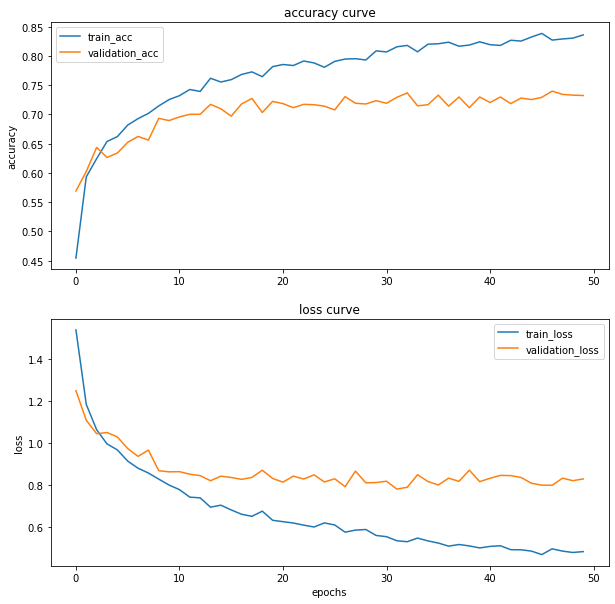

In [10]:
learning_curves(history)